Add more AGN as back-up fields

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import string
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import sys
sys.path.append('../scripts/')
import make_pointings

In [4]:
def get_telenumber ( x ):
    '''
    Map letters onto numbers using the T9 mapping. I never noticed
    before that it's actually not a consistent binning ... 
    '''
    letter_index = string.ascii_lowercase.index(x.lower())
    #print(letter_index)
    analogous_number = int(np.ceil((letter_index+1) / 3)) + 1
    if analogous_number<7:
        return analogous_number
    else:
        if letter_index<=18:
            return 7
        elif letter_index>=22:
            return 9
        else:
            return 8

In [5]:
seed_name = 'BUGS'
seed_name = 'NEWNAME'
seed = int(''.join([ str(get_telenumber(x)) for x in seed_name ]))

In [6]:
agn_catalog = pd.read_csv('../data/GAMA_LowMass.txt', delim_whitespace=True, comment='#', index_col=0)

In [13]:
agn_catalog.head ()

,RA,Dec,BPT_Type,z,logMbh
GAMAID,,,,,
5220386,341.484003,-34.601224,AGN,0.27908,7.7
5275222,345.355121,-34.211354,AGN,0.21019,7.3
5265117,344.603066,-31.236629,AGN,0.11947,6.0
5240292,343.268841,-33.977244,AGN,0.22370,7.5
5247018,344.079748,-30.821977,AGN,0.20899,7.2


In [17]:
additional = pd.DataFrame ( index=['GH14','NSA15235'], 
                            columns = ['RA','Dec'] )
additional.loc['GH14'] = [218.7602428281,3.60239024]
additional.loc['NSA15235'] = [220.1022190311,2.752650365]

In [21]:
additional.to_csv('../data/additional.txt', sep=' ')

In [26]:
exptime_sd = {5:'5min', 1.5:'90sec'}
exptime = 1.5
exptime_s = exptime_sd[exptime]
base_index = 20
seed_l = np.arange(20)
catalog = additional
catalog_name ='additional' # GAMA_LowMass

for index in range(len(catalog.index)):
    for bandpass in ['g','r']:    
        objid = catalog.index[index]
        if catalog_name == 'additional':
            objname = objid
        else:
            objname = f'GAMA{objid}'
        # \\ make new backup directory if not exists
        if not os.path.exists ( f'../json/backup_scripts/{objname}/{exptime_s}'):
            os.makedirs ( f'../json/backup_scripts/{objname}/{exptime_s}', )
        print(objid)
        catalog_l, ocat, frd_l = make_pointings.build_SOAGN ( objid, f'../data/{catalog_name}.txt',
                                                              name = objname,
                                                              seqid='2022B',
                                                              exptime=exptime,
                                                              seed_l=seed_l, filter=bandpass, 
                                                              start_at_center=True )

        for script_index in range(len(catalog_l)):
            json_name = f'../json/backup_scripts/{objname}/{exptime_s}/'
            json_name = f"{json_name}{objname}_{exptime_s}"
            json_name = f"{json_name}AGN_{bandpass}_{script_index+1+base_index:02d}.json"
            print(json_name)
            ocat.to_json ( catalog_l[script_index], fp=json_name, end_with_onemin=False, verbose=False )

GH14
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_21.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_22.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_23.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_24.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_25.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_26.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_27.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_28.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_29.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_30.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_31.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_32.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_33.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_34.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_35.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_36.json
../json/backup_scripts/GH14/90sec/GH14_90secAGN_g_37.json
../json/b

In [6]:
from matplotlib import patches

In [7]:
newbak = pd.read_json('../json/backup_scripts/GAMA5265117/5min/GAMA5265117_5minAGN_g_01.json')

In [9]:
row


comment     OneMinuteFocusExposure
filter                           g
seqtot                          13
seqnum                           1
seqid                        2022B
expType                     object
object                 1minexp_000
proposer                 Leauthaud
program                     Merian
RA                      344.603066
propid                  2020B-0288
dec                     -31.236629
expTime                         60
count                            1
wait                         False
Name: 0, dtype: object

In [14]:
agn_catalog

,RA,Dec,BPT_Type,z,logMbh
GAMAID,,,,,
5220386,341.484003,-34.601224,AGN,0.27908,7.7
5275222,345.355121,-34.211354,AGN,0.21019,7.3
5265117,344.603066,-31.236629,AGN,0.11947,6.0
5240292,343.268841,-33.977244,AGN,0.22370,7.5
5247018,344.079748,-30.821977,AGN,0.20899,7.2
5266552,344.307857,-30.938767,Comp,0.22175,6.0
5337331,349.009578,-34.231887,Comp,0.20193,6.2
5197149,339.824962,-34.050653,Comp,0.20749,6.8


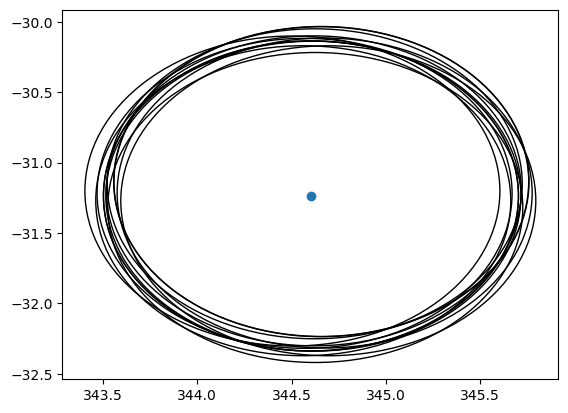

In [15]:
ax = plt.subplot(111)
for name, row in newbak.iterrows ():
    circ = patches.Circle ( (row['RA'], row['dec']), radius=1.1, facecolor='None', edgecolor='k' )
    ax.add_patch ( circ )
idx = 5265117
ax.scatter ( agn_catalog.loc[idx, 'RA'], agn_catalog.loc[idx, 'Dec'], )

In [111]:
for name, row in agn_catalog.iterrows():
    objname = f'GAMA{name}'
    ra = row['RA']
    dec = row['Dec']
    print(f"'{objname}':coordinates.SkyCoord({ra},{dec},unit='deg'),")

'GAMA5220386':coordinates.SkyCoord(341.4840027,-34.6012237,unit='deg'),
'GAMA5275222':coordinates.SkyCoord(345.3551208,-34.2113545,unit='deg'),
'GAMA5265117':coordinates.SkyCoord(344.6030656,-31.2366291,unit='deg'),
'GAMA5240292':coordinates.SkyCoord(343.2688411,-33.9772443,unit='deg'),
'GAMA5247018':coordinates.SkyCoord(344.079748,-30.8219773,unit='deg'),
'GAMA5266552':coordinates.SkyCoord(344.3078567,-30.9387669,unit='deg'),
'GAMA5337331':coordinates.SkyCoord(349.0095776,-34.2318865,unit='deg'),
'GAMA5197149':coordinates.SkyCoord(339.824962,-34.0506528,unit='deg'),


In [109]:
name

5220386

In [110]:
row

RA          341.484003
Dec         -34.601224
BPT_Type           AGN
z              0.27908
logMbh             7.7
Name: 5220386, dtype: object